# Numerical Optimization: Going a Bit Deeper

In this notebook we'll review and compare 3 types of optimization algorithms;
 1. grid search, which we covered in the last lesson
 2. derivative-free, which use some rules to explore parameter space without calculating any derivatives
 3. derivative-based, which use 1st and sometimes 2nd derivatives to guide search

At the end of the notebook, we'll apply what we learned in a *Practical Exercise*.

## Grid search

Technically these are a type of derivative-free algorithm. Because of their very simple logic, and because we already covered them in the last lesson, I've put them in a separate category.

**Advantages:**
  - robust to non-differentiability
  - robust to complex surface

**Disadvantages:**
  - tyically requires higher number of function evaluations (even the iterative flavor)
  - extremely susceptible to "curse of dimensionality". Feasibility diminishes rapidly above 1 or 2 dimensions





## Derivative-free

There is a set of algorithms based on rules which are "smarter" than a grid search and do not require so many function evaluations, but still do not compute derivatives. The best known is Nelder-Mead. 

A description of the steps is given below. Don't worry too much about understanding all of the details now: it is provided mostly as a reference.

### Nelder-Mead Algorithm Description

**Problem:** Minimize a function $f: \mathbb{R}_n \to \mathbb{R}$.

**Setup:** The first step is to construct a *simplex* of $n + 1$ vectors. In one-dimensional space, a simplex is two points. In two-dimensional space, it is a triangle. In three-dimensional space, it is a triangular-base pyramid. Etc. There are various methods by which one could construct a simplex: often we start with a single starting vector $\mathbf{x}_0$ and modify the values one at a time by a certain amount until we have $n+1$ vectors.

**Recurring steps:** Given the function $f: \mathbb{R}_n \to \mathbb{R}$ to minimize, the initial simplex $\left \{\mathbf{x}_i  \right \}_{i=1}^{n+1}$, and paramters:
  - $\alpha > 0$
  - $\gamma > 1$
  - $\rho \in (0,0.5]$
  - $\sigma \in (0,1)$

...the following steps should be followed iteratively until the stopping condition specified in Step 1 is reached.

  1. **Convergence check:** Check if average distance between points of the simplex falls below a given threshold. If condition is met, **stop**.
  2. **Order:** Sort the points in our simplex according to their function values from low to high, so that for the set $\left \{\mathbf{x}_i  \right \}_{i=1}^{n+1}$, $1 = {\text{arg} \min}\limits_{i \in \{1,2,...,n+1\}} f(\mathbf{x}_i)$ and $n+1 = {\text{arg} \max}\limits_{i \in \{1,2,...,n+1\}} f(\mathbf{x}_i)$.
  3. **Centroid:** Calculate the centroid of all points except the worst one: $\mathbf{x}_O = \frac{1}{n} \sum\limits_{i=1}^n \mathbf{x}_i$
  4. **Reflection:** Compute reflected point $\mathbf{x}_r = \mathbf{x}_O + \alpha(\mathbf{x}_O - \mathbf{x}_{n+1})$.
       - **If** $f(\mathbf{x_1}) \leq f(\mathbf{x}_r) < f(\mathbf{x}_n)$, **then** replace $\mathbf{x}_{n+1}$ with $\mathbf{x}_r$ and **go to Step 1**.
  6. **Expansion:** **If** $f(\mathbf{x_r}) < f(\mathbf{x}_1)$, **then** compute $\mathbf{x}_e = \mathbf{x}_O + \gamma (\mathbf{x}_r - \mathbf{x}_O)$.
       - **If** $f(\mathbf{x_e}) < f(\mathbf{x}_r)$ **then** replace $\mathbf{x}_{n+1}$ with $\mathbf{x}_e$ and **go to Step 1**.
       - **Else** replace $\mathbf{x}_{n+1}$ with $\mathbf{x}_r$ and **go to Step 1**.
  7. **Contraction:** Note that if we reach this step, it's certain that $f(\mathbf{x}_r) > f(\mathbf{x}_n)$.
       - **If** $f(\mathbf{x}_r) < f(\mathbf{x}_{n+1})$ **then** compute $\mathbf{x}_c = \mathbf{x}_O + \rho (\mathbf{x}_r - \mathbf{x}_O)$.
       - **Else if** $f(\mathbf{x}_r) \geq f(\mathbf{x}_{n+1})$ **then** compute $\mathbf{x}_c = \mathbf{x}_O + \rho (\mathbf{x}_{n+1} - \mathbf{x}_O)$.
       - Then **if** $f(\mathbf{x}_c) < \max \{ f(\mathbf{x}_r), f(\mathbf{x}_{n+1})$, **then** replace $\mathbf{x}_{n+1}$ with $\mathbf{x}_c$ and **go to Step 1**.
       - **Else** **go to Step 8**.
  8. **Shrink:** replace all points except the best according to $\mathbf{x}_i = \mathbf{x}_1 + \sigma (\mathbf{x}_i - \mathbf{x}_1)$ for $i \in \{2, 3, ... n+1\}$. **Go to Step 1**.

Standard parameter values are $\alpha = 1$, $\gamma = 2$, $\rho = 0.5$, and $\sigma = 0.5$.

### Path of convergence for Nelder-Mead

A path of convergence for the Nelder-Mead algorithm in 2 dimensions might look something like what is shown in the graphic below, with initially large triangles (simplexes) flopping around, "feeling" out the parameter space, before contracting and collapsing around the solution.

![Nelder Mead Convergence Path](./neldermead.png)

### Pros and cons of Nelder-Mead


**Advantages:**
  - robust to non-differentiability
  - not very affected by "curse of dimensionality"

**Disadvantages:**
  - requires more steps and often more function evaluations than derivative-based methods
  - prone to early stopping. To successfully converge, you may need to set up an auxiliary algorithm to iteratively "restart" several times.
  - difficulty converging with *very* high dimensionality situations which are common now in Machine Learning and AI contexts (hundreds/thousands/+ of parameters).


## Derivative-based methods

The most commonly-used optimization algorithms use derivatives in some way, and the most classic derivative-based method is **Newton's Method**, operationalized for numeric optimization as the **Newton-Raphson Method**.

### Underlying math of Newton's Method

Let $g(x)$ represent the second-order Taylor approximation of $f(x)$ around an initial point $x_i$. $g(x)$ is given by

$$f(x) \approx g(x) = f(x_i) + f'(x_i)(x-x_i) + \frac{1}{2}f''(x_i)(x-x_i)^2 $$

The first derivative of $g(x)$ is then

$$g'(x) = f'(x_i) + f''(x_i)(x-x_i) $$

The minimum (or maximum) point $x_{i+1}$ of parabola $g(x)$ is the point where $g'(x) = 0$. Then,



$$\begin{align}0 &= f'(x_i) + f''(x_i)(x_{i+1}-x_i) \\ \\
f''(x_i)(x_{i+1}-x_i) &= -f'(x_i) \\ \\
x_{i+1}-x_i &= -\frac{f'(x_i)}{f''(x_i)} \\ \\
x_{i+1} &= x_i-\frac{f'(x_i)}{f''(x_i)} \end{align}$$

### Newton's Method Definition

Given an initial point $x_0$, compute $x_{i+1}$ as $x_{i+1} = x_i-\frac{f'(x_i)}{f''(x_i)}$, for $i \in \{0, 1, 2, ...\}$, until $|f'(x_{i+1})| \leq \phi$ for some threshold value $\phi > 0$.



### Path of convergence for Newton-Raphson

The path of convergence for the Newton-Raphson method may resemble that shown in the graphic below. Note how each step zeros in on the minimum of the local 2nd-order approximation of the function. A quadratic function with the pure Newton method should converge in 1 step.

![Newton-Raphson Convergence Path](./newtonraphson.jpg)

### The multi-dimensional case

Strictly speaking, the derivation and definition we gave above applies only to functions $f: \mathbf{R} \to \mathbf{R}$. The corresponding derivation and definition for $f: \mathbf{R}^n \to \mathbf{R}$ is analogous.


Let $g(\mathbf{x})$ represent the second-order Taylor approximation of $f(\mathbf{x})$ around an initial point $\mathbf{x}_i$. $g(\mathbf{x})$ is given by

$$\underset{1 \times 1}{f(\mathbf{x})} \approx \underset{1 \times 1}{g(\mathbf{x})} = \underset{1 \times 1}{f(\mathbf{x}_i)} + \underset{1 \times n}{\nabla f(\mathbf{x}_i)'} \underset{n \times 1}{(\mathbf{x}-\mathbf{x}_i)} + \frac{1}{2} \underset{1 \times n}{(\mathbf{x}-\mathbf{x}_i)'} \underset{n \times 1}{\mathbb{H} (\mathbf{x}_i)} \underset{n \times 1}{(\mathbf{x}-\mathbf{x}_i)} $$

...where $\nabla f(\mathbf{x}_i)$ is the $n \times 1$ "gradient" vector of first derivatives and $\mathbb{H}(\mathbf{x})$ is the $n \times n$ "Hessian" matrix of second derivatives at point $\mathbf{x}$.

It then follows that, analagously to the one-dimensional case, the unique optimum of the hyper-parabola represented by $g(\mathbf{x})$ is to be found at $x_{i+1}$ given by

$$\begin{align} \underset{n \times 1}{\mathbf{x}_{i+1}} &= \underset{n \times 1}{\mathbf{x}_i}- \underset{n \times n}{\mathbb{H} (\mathbf{x}_i)}^{-1} \underset{n \times 1}{\nabla f(\mathbf{x}_i)} \end{align}$$

Then the same method definition can be applied, with the modification that the stopping condition should consider how close *all* of the values in the gradient are to 0.


### Implementation details

With the definition above, the method will find both minima *and* maxima without distinction, which may be an issue if both exist. Some auxiliary rules (which we won't cover here) are required to turn it into a true *minimization* algorithm directly comparable to Nelder-Mead.

There is also a key question of whether the analytical solutions for the first or the second derivatives are coded up in functions and provided to the algorithm, or if numerical differentiation must be used. Newton-Raphson typically performs much better in all aspects when analytical first and second derivatives are provided.

### Pros and Cons of Newton-Raphson

**Advantages:**
  - convergence is usually achieved in small number of steps and function evaluations
  - convergence (non-convergence) is well understood mathematically. In certain conditions, convergence is guaranteed.

**Disadvantages:**
  - can be confused by complex surfaces
  - can fail if function is non-differentiable in some points or regions
  - "curse of dimensionality" starts to bite in high dimensions because the number of second derivatives which must be computed scales by $n**2$. This is *especially* true if first and/or second derivatives are being computed numerically.

### Gradient descent

In the context of Machine Learning and AI, a modified derivative-based method called *gradient descent* is commonly used. It mitigates the curse of dimensionality which affects these extremely-high-dimensional problems by simple doing away with the second derivative altogether, and only using first derivatives. The lack of second derivatives to determine step size means that an auxiliary system must be devised to determine the size of each step.

We won't work with gradient descent in this lesson, but we will review some of the pros and cons.

**Advantages:**
  - same as Newton Raphson, convergence (non-convergence) is well understood mathematically. In certain conditions, convergence is guaranteed.
  - less affected by the curse of dimensionality. More feasible for very high-dimensional problems.
  - can be combined with sub-sampling of data points (*stochastic* gradient descent) to increase computational efficiency even further in high-dimensional, big data use cases.

**Disadvantages:**
  - same as Newton Raphson, can be confused by complex surfaces
  - same as Newton Raphson, can fail if function is non-differentiable in some points or regions. This is why Machine Learning and AI models are typical use well-behaved functions as their elementary building blocks!
  - need to define some auxiliary algorithm to choose step sizes in the absence of guidance from second derivatives.





## Optimizing along 1 dimension

Let's test out our optimization algorithms for the case of a vector-valued function that takes a single input.

In the cell below, 2 classes and 2 functions are defined:
  - `optimization_simulator` is the base class for 1 or 2- (or more?) -dimensional optimization simulators, which will produce step-by-step visualizations.
  - `optimization_simulator_1d` is a subclass for 1 dimension--the one we're working with now!
  - `gridsearch_min_step` performs 1 iteration/step of iterative grid search, compatible with `optimization_simulator`, for *1 dimension only*
  - `scipy_newtonraphson_step` wraps SciPy's 1-dimensional Newton-Raphson algorithm for `optimization_simulator`
  - `scipy_neldermead_step` wraps SciPy's Nelder Mead algorithm for `optimization_simulator`. It can work in 1 *or more* dimensions.

We've also defined two choices of functions to optimize, together with their analytical first derivatives.

In [5]:
from IPython.display import clear_output
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


class optimization_simulator():
    def __init__(self,f,opt_step,display_grid,
                 tol=1e-12,max_steps=1000,fprime=None,fprime2=None,
                 figsize=(6,4),
                 minpoint=None,
                 showits=[0,1,2,3,4,5,10,15,20,25,30,40,50,75,100,150,200,300,400,500,750,1000]
                ):
        self.f = f
        self.opt_step = opt_step
        self.display_grid = display_grid
        self.converge_tol = tol
        self.max_steps = max_steps
        self.fprime = fprime
        self.fprime2 = fprime2
        self.figsize = figsize
        self.minpoint = minpoint
        self.showits = showits
        
    def optimize(self,x0,x1):
        
        x_series = [np.array([x0]).flatten(),np.array([x1]).flatten()]
        its = 0
        total_fevals = 0
        for j in range(self.max_steps + 1):
            clear_output()

            diff = np.sum(np.abs(x_series[-1] - x_series[-2]))
            
            if (diff < self.converge_tol) or j > self.max_steps-1:
                will_break = True
            else:
                will_break = False
            if will_break or its in self.showits:
                self.make_display(x_series)
                
                if self.minpoint is not None:
                    plt.plot(self.minpoint[0],self.minpoint[1],'k+')
                plt.title(f'iteration {its}')
                plt.show()
                input("Press Enter to continue...")
            if will_break:
                if (diff < self.converge_tol): 
                    print(f'Converged after {its} iterations and {total_fevals:,d} total function evaluations.')
                else:
                    print('Not converged.')
                break
            
            x0_prime,x1_prime,fevals = self.opt_step(self.f,x_series[-1],x_series[-2],fprime=self.fprime,fprime2=self.fprime2)
            its += 1
            total_fevals += fevals
            
            x_series += [x0_prime,x1_prime]

        return x_series,its,total_fevals

    def make_display(self,x_series,its):
        pass

class optimization_simulator_1d(optimization_simulator):
    def __init__(self,*args,figsize=(6,4),**kwargs):
        super().__init__(*args,figsize=figsize,**kwargs)
        
    def make_display(self,x_series):
        plt.figure(figsize=self.figsize)
        plt.plot(self.display_grid,self.f(self.display_grid))
        plt.plot(x_series[1:],self.f(np.array(x_series[1:])),'ro',alpha=.4)
        

def gridsearch_min_step(f,x1,x0,Ngrid=100,fprime=None,fprime2=None):
    xgrid = np.linspace(x1,x0,Ngrid)
    fx_results = f(xgrid)
    best_ind = np.argmin(fx_results)
    x_best = np.array([xgrid[best_ind]]).flatten()
    fx_results = np.delete(fx_results,[best_ind])
    xgrid = np.delete(xgrid,[best_ind])
    nextbest_ind = np.argmin(fx_results)
    x_nextbest = np.array([xgrid[nextbest_ind]]).flatten()
    return x_nextbest,x_best,Ngrid

def scipy_newtonraphson_step(f,x1,x0,fprime=None,fprime2=None):
    return x1,sp.optimize.newton(f,x1,maxiter=1,disp=False,fprime=fprime,fprime2=fprime2),2

def scipy_neldermead_step(f,x1,x0,fprime=None,fprime2=None):
    output = sp.optimize.minimize(f,x1,method='Nelder-Mead',options=dict(maxiter=2,disp=False))
    return x1,output.x,output.nfev


a_parabola = lambda x:x**2
a_parabola_fprime = lambda x:2*x

a_wavy_func = lambda x:np.sin(x**2 + x)*np.exp(-x**2)
a_wavy_func_prime = lambda x:np.cos(x**2 + x)*(2*x+1)*np.exp(-x**2) - 2*x*np.exp(-x**2)*np.sin(x**2 + x)



### Example: A parabola

In the following cells, we'll see how each algorithm performs optimizing a simple parabola.

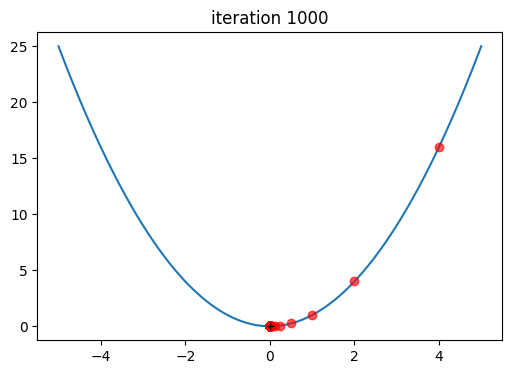

Press Enter to continue... 


Not converged.


In [18]:
## Newton Raphson, with analytical first derivative

newton_raphson_1d_sim = optimization_simulator_1d(a_parabola,scipy_newtonraphson_step,np.linspace(-5,5,1000),
                                                  minpoint=(0,0),
                                                  #fprime=a_parabola_fprime
                                                 )

x_series,its,total_fevals = newton_raphson_1d_sim.optimize(-4,4)

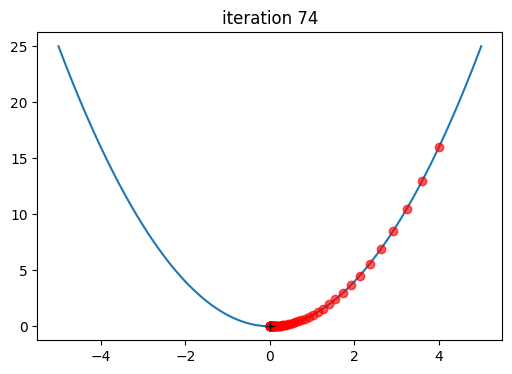

Press Enter to continue... 


Converged after 74 iterations and 294 total function evaluations.


In [14]:
## Nelder Mead

neldermead_1d_sim = optimization_simulator_1d(a_parabola,scipy_neldermead_step,np.linspace(-5,5,1000),
                                                  minpoint=(0,0),
                                                  fprime=a_parabola_fprime
                                                 )

x_series,its,total_fevals = neldermead_1d_sim.optimize(-4,4)

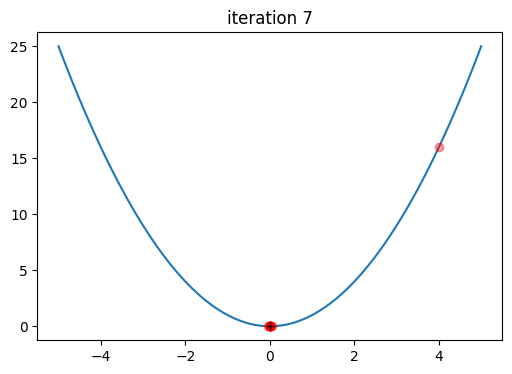

Press Enter to continue... 


Converged after 7 iterations and 700 total function evaluations.


In [15]:
## Grid search

gridsearch_1d_sim = optimization_simulator_1d(a_parabola,gridsearch_min_step,np.linspace(-5,5,1000),
                                                  minpoint=(0,0),
                                                  fprime=a_parabola_fprime
                                                 )

x_series,its,total_fevals = gridsearch_1d_sim.optimize(-4,4)

### Quick exercise for 1-dimensional optimization

 - Try each of the 3 algorithms out on the "wavy function" defined above: $$f(x) = \sin(x^2 + x) \cdot e^{-x^2} $$. Note that the first derivative has been provided. Try different starting points. What do you see?
 - Try each of the 3 algorithms out on a third function that you define.
 - Try Newton Raphson on the parabola but without the analytical derivative. How does its performance differ?

## Two-dimensional optimization


Now let's try optimizing scalar-valued functions with 2 inputs.

In the cell below, 1 class and 2 functions are defined:
  - `optimization_simulator_2d` is a subclass of `optimization_simulator` for 2 dimensions
  - `scipy_newtoncg_step` wraps SciPy's Newton-CG algorithm for `optimization_simulator`. It can work with 1, 2 or more dimensions, and requires that an analytical first derivative (aka a *gradient* or *Jacobian*) be supplied.
  - `gridsearch_2d_min_step` performs 1 iteration/step of iterative grid search, compatible with `optimization_simulator`, for *2 dimensions only*

We've also defined two choices of functions to optimize, together with their analytical first *gradients*.

In [9]:
class optimization_simulator_2d(optimization_simulator):
    def __init__(self,*args,figsize=(5,4),**kwargs):
        super().__init__(*args,figsize=figsize,**kwargs)
        
    def make_display(self,x_series):
        fig, ax = plt.subplots(figsize=self.figsize)
        p = ax.contour(self.display_grid[0], self.display_grid[1], self.f(self.display_grid),cmap=plt.cm.RdBu)#, vmin=abs(Z).min(), vmax=abs(Z).max() )
        cb = fig.colorbar(p, ax=ax)
        for xx in x_series[1:]:
            plt.plot(xx[0],xx[1],'ro',alpha=.4)


def scipy_newtoncg_step(f,x1,x0,fprime=None,fprime2=None):
    output = sp.optimize.minimize(f,x1,method='Newton-CG',jac=fprime,options=dict(maxiter=1,disp=False))
    return x1,output.x,output.nfev
    
def gridsearch_2d_min_step(f,x1,x0,Ngrid=100,fprime=None,fprime2=None):
    xmesh = np.meshgrid(np.linspace(x1[0],x0[0],Ngrid),
                        np.linspace(x1[1],x0[1],Ngrid))
    fx_results = f(xmesh)
    best_ind = np.unravel_index(np.argmin(fx_results),fx_results.shape)
    x_best = np.array([xmesh[0][best_ind],xmesh[1][best_ind]])
    fx_results[best_ind] = 1.*float('inf')
    nextbest_ind = np.unravel_index(np.argmin(fx_results),fx_results.shape)
    x_nextbest = np.array([xmesh[0][nextbest_ind],xmesh[1][nextbest_ind]])
    return x_nextbest,x_best,Ngrid**2

a_circle_func = lambda x:(5*x[0]-2)**2 + (3*x[1]-3)**2 - 50
a_circle_func_grad = lambda x:np.array([10*(5*x[0]-2), 6*(3*x[1]-3)**2 ])

rastrigin = lambda x: x[0]**2 - 10*np.cos(2*np.pi*x[0]) + x[1]**2 - 10*np.cos(2*np.pi*x[1])
rastrigin_grad = lambda x: np.array([2*x[0] + 20*np.pi*np.sin(2*np.pi*x[0]),
                                    2*x[1] + 20*np.pi*np.sin(2*np.pi*x[0])])


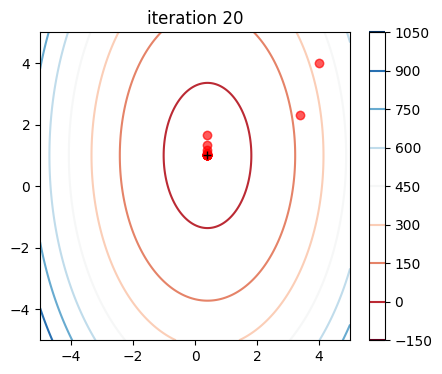

Press Enter to continue... 


Converged after 20 iterations and 40 total function evaluations.


In [41]:
newtoncg_2d_demo_circle = optimization_simulator_2d(a_circle_func,scipy_newtoncg_step,
                                                     np.meshgrid(np.linspace(-5,5,1000),np.linspace(-5,5,1000)),
                                                     minpoint=[.4,1],
                                                     fprime=a_circle_func_grad)


x_series,its,total_fevals = newtoncg_2d_demo_circle.optimize(np.array([-4,-4]),np.array([4,4]))

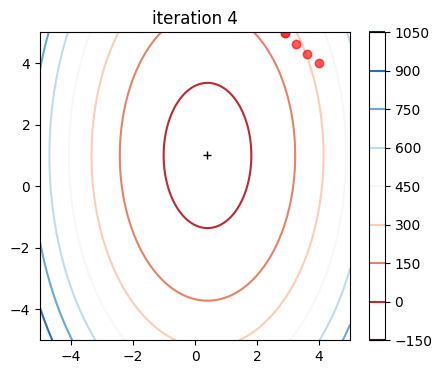

Press Enter to continue... 


Converged after 4 iterations and 19 total function evaluations.


In [42]:
neldermead_2d_demo_circle = optimization_simulator_2d(a_circle_func,scipy_neldermead_step,
                                                     np.meshgrid(np.linspace(-5,5,1000),np.linspace(-5,5,1000)),
                                                     minpoint=[.4,1],
                                                     fprime=a_circle_func_grad)


x_series,its,total_fevals = neldermead_2d_demo_circle.optimize(np.array([-4,-4]),np.array([4,4]))

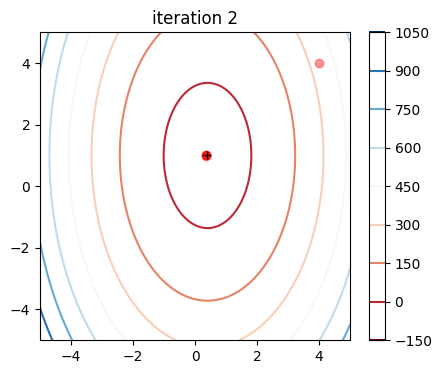

Press Enter to continue... 


Converged after 2 iterations and 20,000 total function evaluations.


In [43]:
grid_2d_demo_circle = optimization_simulator_2d(a_circle_func,gridsearch_2d_min_step,
                                                     np.meshgrid(np.linspace(-5,5,1000),np.linspace(-5,5,1000)),
                                                     minpoint=[.4,1],
                                                     fprime=a_circle_func_grad)


x_series,its,total_fevals = grid_2d_demo_circle.optimize(np.array([-4,-2]),np.array([4,4]))

### Quick exercises for 2-dimensional optimization

 - Try all 3 algorithms for the circle function from different starting points. Do some starting points work better than others?
 - Try all 3 algorithms for the Rastrigin function. Try different starting points. What do you observe?

# Practical exercise

Code up your own implementation of Newton's Method *for one dimension*. Your solution should be capable of either taking analytical first and second derivatives as arguments, or computing them numerically.

Wrap your function in a way to make it compatible with the optimization simulator defined above. Compare its performance to the other algorithms.

*BONUS:* If you feel very ambitious, do the same for for 2 (or $n$) dimensions.